In [4]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [ ]:
dir = "/user/work/pu22650/clip-binding-out/T5_FT_rel_5"
path_list = [os.path.join(dir, f'cos_sim_{split}.csv') for split in ['train', 'val', 'gen']]
shape_path_list = [os.path.join(dir, f'shape_{split}.csv') for split in ['train', 'val', 'gen']]
rel_path_list = [os.path.join(dir, f'rel_{split}.csv') for split in ['train', 'val', 'gen']]

In [9]:
def plot_cm(path):
    df = pd.read_csv(path)
    y_pred = df.idxmax(axis=1).tolist()
    y_true = ['aRb'] * len(y_pred)
    labels = ['aRb', 'bRa', 'aSb', 'cRb', 'aRc']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    split = path.split('.')[0].split('_')[-1]
    plt.title(f'Confusion Matrix for the {split} Set')
    plt.savefig(f'confusion_matrix_{split}.pdf', bbox_inches='tight')

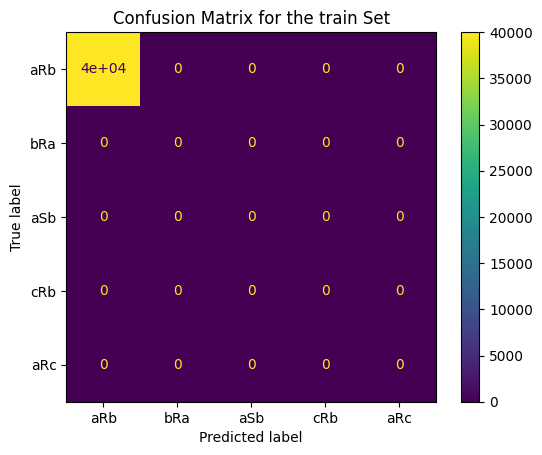

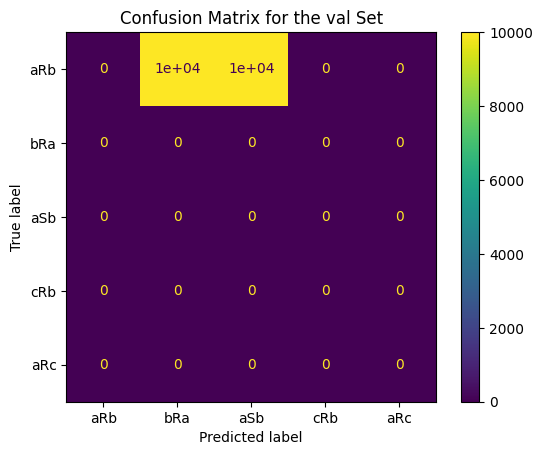

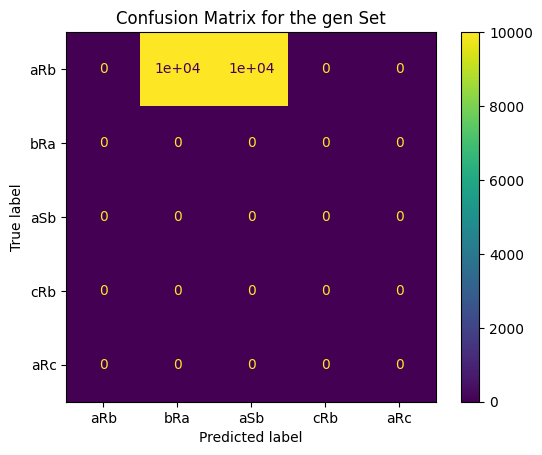

In [10]:
for path in path_list:
    plot_cm(path)

In [2]:
def plot_cm_shape_rel(path):
    df = pd.read_csv(path)
    y_pred = df['pred'].tolist()
    y_true = df['true'].tolist()
    labels = ["front", "behind", "left", "right"]
    if 'shape' in path:
        labels = ['cube', 'cylinder', 'sphere']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    split = path.split('.')[0].split('_')[-1]
    plt.title(f'Confusion Matrix for the {split} Set')
    # plt.savefig(f'confusion_matrix_{split}.pdf', bbox_inches='tight')

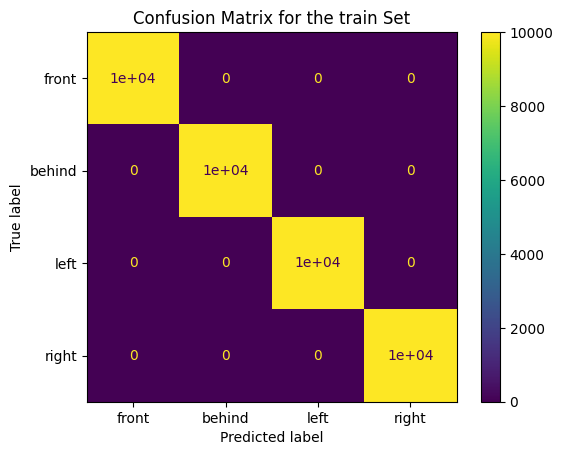

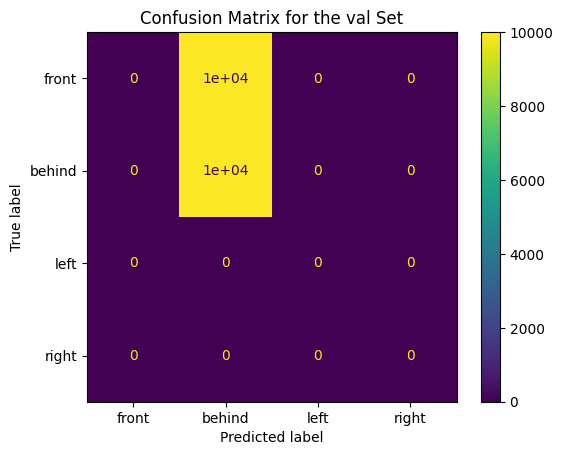

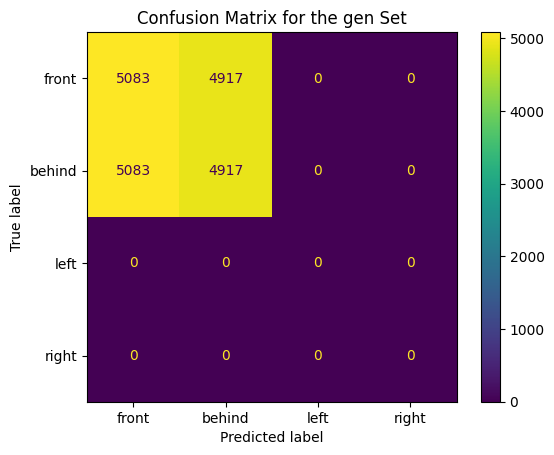

In [5]:
for rel_path in rel_path_list:
    plot_cm_shape_rel(rel_path)

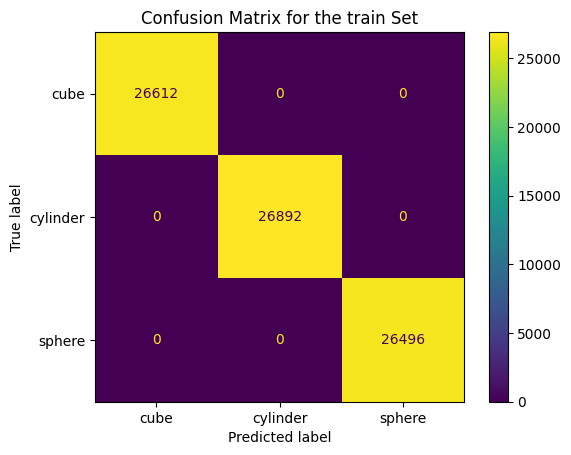

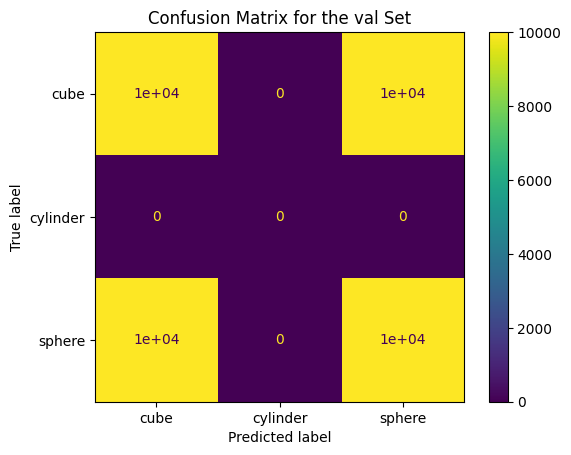

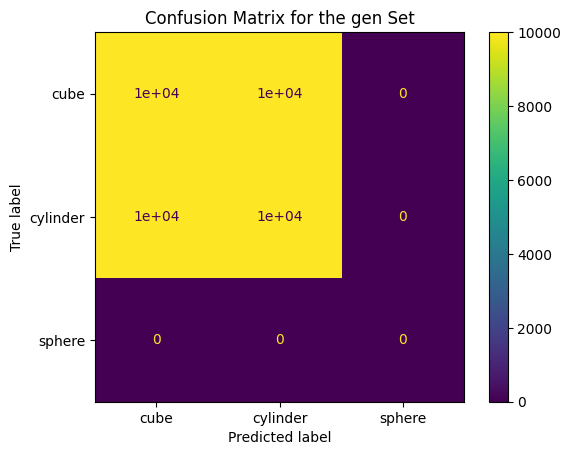

In [6]:
for shape_path in shape_path_list:
    plot_cm_shape_rel(shape_path)